<h1>Analyse du Comportement des Utilisateurs</h1>
Dans une plateforme C2C, les utilisateurs jouent un rôle crucial en tant que fournisseurs et clients. Comprendre leur comportement est essentiel pour optimiser l'engagement et la croissance.

Ce jeux de données, extrait d'une boutique de mode en ligne lancée en Europe en 2009, après environ 10 ans de lancement du site Web, se concentre sur les utilisateurs enregistrés actifs.

<b>Objectif principal :</b>
Analyser et visualiser le comportement des utilisateurs afin d'identifier les facteurs influençant leur activité et leur engagement sur la plateforme.

<b>Hypothèses :</b>
<ol>
  <li>L'utilisation d'une application mobile influence l'engagement des utilisateurs, notamment en termes d'achats et de ventes.</li>
  <li>Les utilisateurs ayant une présence sociale plus forte (suiveurs, likes, etc.) sont plus actifs en termes de transactions.</li>
  <li>Certains profils démographiques (genre, ancienneté, langue) ont un impact sur l'activité des utilisateurs.</li>
  <li>L'ancienneté sur la plateforme et la fréquence de connexion influencent la fidélisation et l'activité des utilisateurs.</li>
</ol>

## I. Compréhension des données

In [1]:
# importation des bibliotheque
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew  

db = pd.read_csv('../data/users.dataset.csv')
db.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [2]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

<Axes: ylabel='count'>

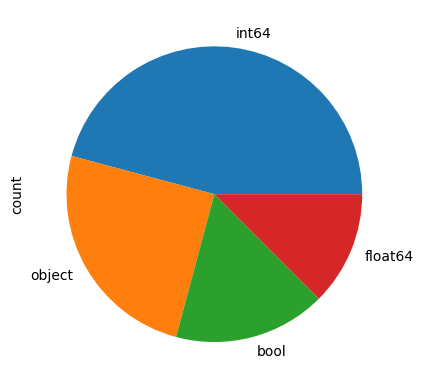

In [3]:
db.dtypes.value_counts().plot.pie()

## II. Nettoyage des données

### 1. Vérifier les valeurs manquants 

In [4]:
db.isna().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

<Axes: >

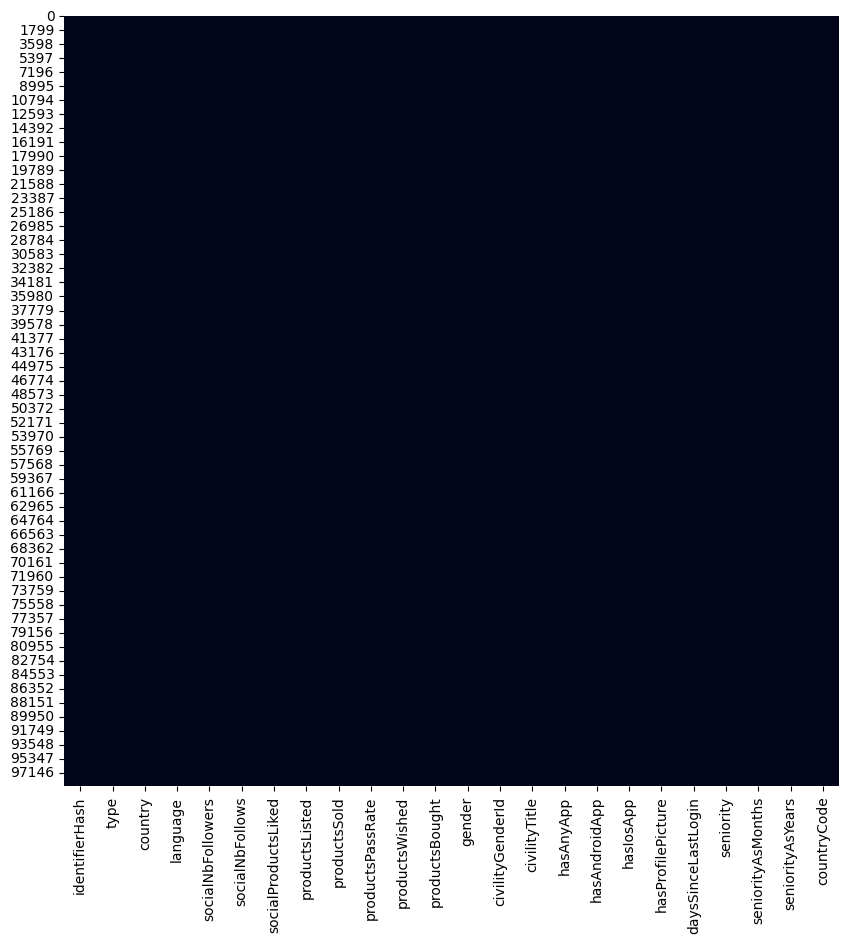

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(db.isna() , cbar=False) 

> On constate que notre table ne présente pas de valeurs manquantes.

### 2. Supprimer les valeurs en double

In [6]:
db.drop_duplicates(subset='identifierHash',keep='first',inplace=True)

In [7]:
repeat_columns = []
# les métadonnées inutilisées et répétées sont supprimées
repeat_columns += ['identifierHash', 'type','country','gender','civilityTitle']
db1=db.drop(repeat_columns,axis=1)
db1.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,en,147,10,77,26,174,74.0,104,1,1,True,False,True,True,11,3196,106.53,8.88,gb
1,en,167,8,2,19,170,99.0,0,0,2,True,False,True,True,12,3204,106.80,8.90,mc
2,fr,137,13,60,33,163,94.0,10,3,2,True,False,True,False,11,3203,106.77,8.90,fr
3,en,131,10,14,122,152,92.0,7,0,2,True,False,True,False,12,3198,106.60,8.88,us
4,en,167,8,0,25,125,100.0,0,0,2,False,False,False,True,22,2854,95.13,7.93,us


###  3. l'asymétrie des données (Skewness)

> Si Skewness nulle : La distribution est symétrique, avec une répartition équilibrée des données autour de la moyenne.

In [8]:
db.select_dtypes(include='number').skew()

identifierHash           0.001134
socialNbFollowers       88.816910
socialNbFollows        220.876679
socialProductsLiked    244.157743
productsListed          64.893219
productsSold            41.595633
productsPassRate        10.667299
productsWished          49.256959
productsBought          84.797360
civilityGenderId        -1.140820
daysSinceLastLogin      -1.675425
seniority               -0.427090
seniorityAsMonths       -0.427092
seniorityAsYears        -0.427311
dtype: float64

> La majorité des variables présentent une forte asymétrie positive, notamment <b>socialNbFollowers</b>, <b>socialNbFollows</b>, <b>socialProductsLiked</b>, et <b>productsListed</b>, indiquant des valeurs extrêmes élevées. Les variables <b>civilityGenderId</b> et <b>daysSinceLastLogin</b> ont une asymétrie négative, suggérant une concentration des valeurs vers la droite. <b>seniority</b>, <b>seniorityAsMonths</b>, et <b>seniorityAsYears</b> sont légèrement asymétriques et proches de la normalité. identifierHash est quasi symétrique avec une distribution équilibrée.

### 4. Gérer les valeures aberrantes


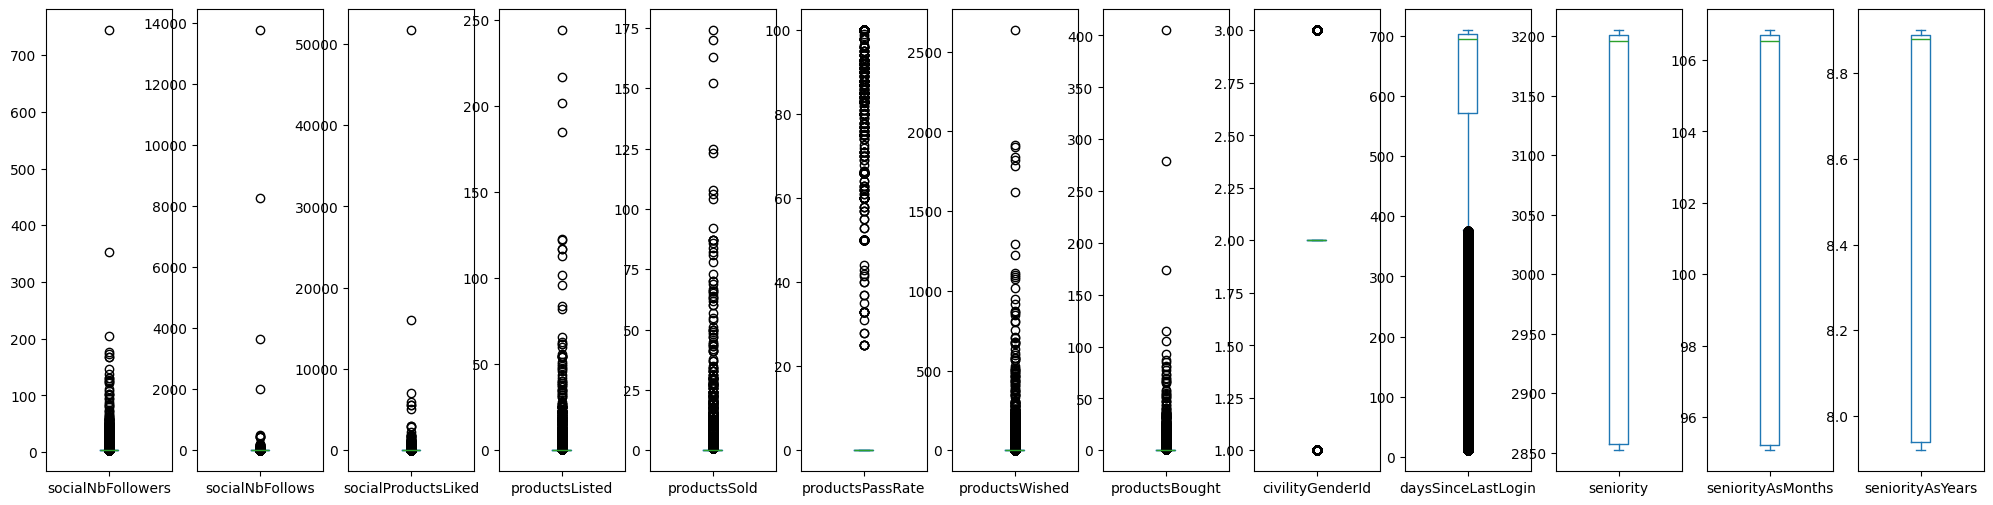

In [9]:
colonnes_numeriques = db1.select_dtypes(include='number').columns
db1[colonnes_numeriques].plot(kind='box', subplots=True, layout=(1, len(colonnes_numeriques)), figsize=(25, 6))
plt.show()


>Certaines variables, comme <b>daysSinceLastLogin</b>, <b>seniority</b>, et <b>seniorityAsYears</b>, affichent des plages de valeurs très larges avec une forte concentration de valeurs proches des médianes. Les variables liées aux interactions sociales et aux produits présentent une majorité d’utilisateurs avec de faibles valeurs et quelques cas extrêmes influençant les distributions.

In [ ]:
import numpy as np

# Liste des colonnes numériques à traiter
colonnes_numeriques = ['daysSinceLastLogin', 'seniority', 'seniorityAsMonths', 'seniorityAsYears']

# On crée une copie du DataFrame pour le filtrage
db1_filtre = db1.copy()

# Pour chaque colonne numérique, on supprime les valeurs aberrantes
for col in colonnes_numeriques:
    mean = db1_filtre[col].mean()
    std = db1_filtre[col].std()
    z_score = (db1_filtre[col] - mean) / std
    db1_filtre = db1_filtre[np.abs(z_score) <= 3]

print(db1_filtre.shape)


(98913, 19)


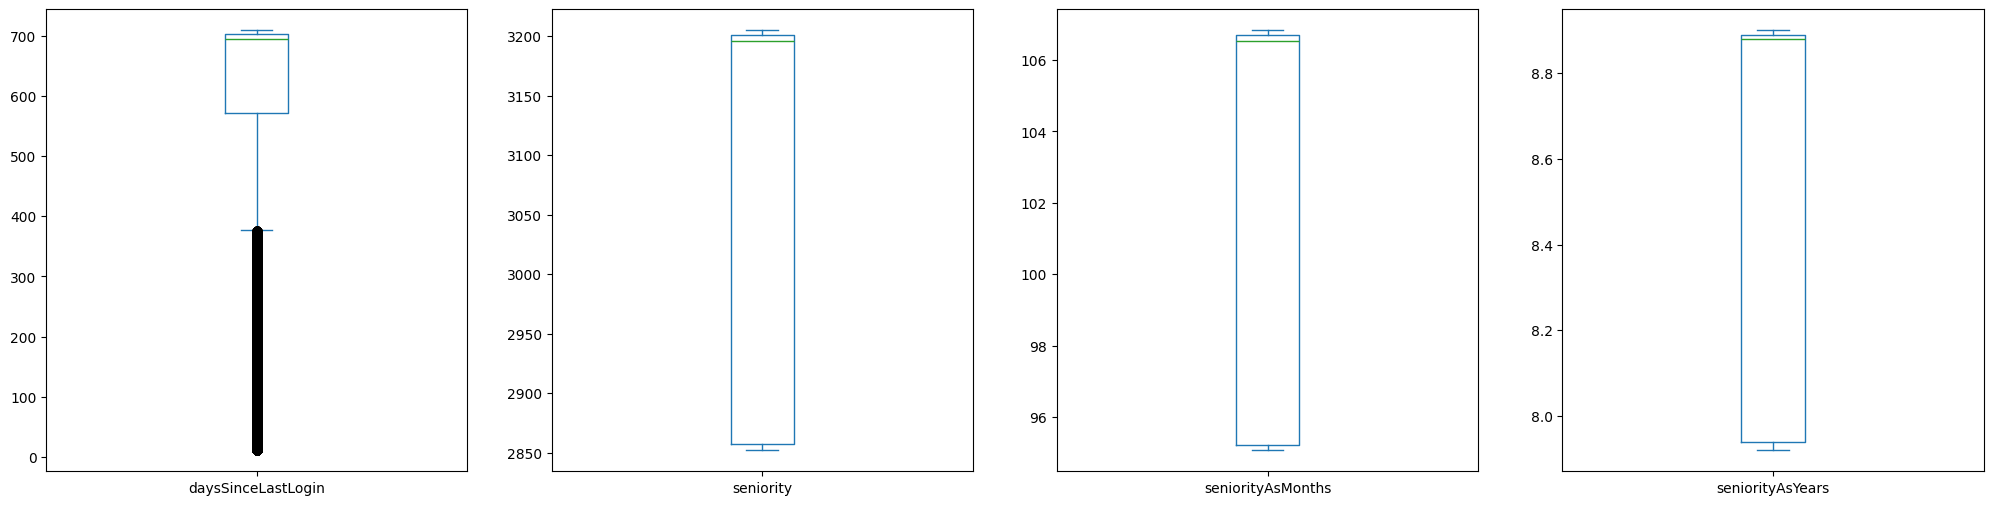

In [11]:

db1[colonnes_numeriques].plot(kind='box', subplots=True, layout=(1, len(colonnes_numeriques)), figsize=(25, 6))
plt.show()


>Avant filtrage : variable <b>daysSinceLastLogin</b> présente une forte dispersion et de nombreuses valeurs aberrantes.

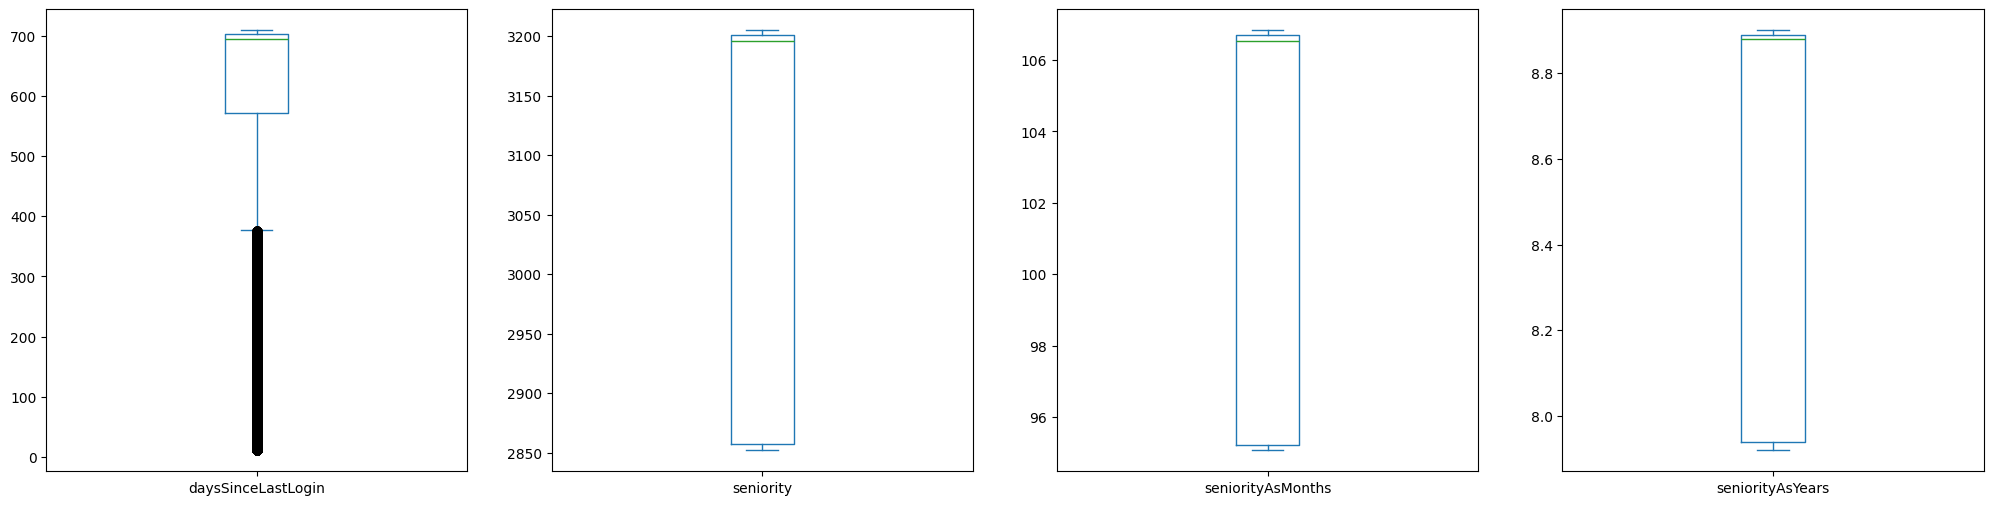

In [12]:

db1_filtre[colonnes_numeriques].plot(kind='box', subplots=True, layout=(1, len(colonnes_numeriques)), figsize=(25, 6))
plt.show()

>Après filtrage : certaines valeurs extrêmes restent présentes, indiquant que le critère de filtrage n'a pas totalement éliminé les outliers.


>Pour <b>seniority</b>, <b>seniorityAsMonths</b>, et <b>seniorityAsYears</b> semblent peu affectées par le filtrage, suggérant une faible variabilité dans ces variables.

### 5. encodage

In [13]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   language             98913 non-null  object 
 1   socialNbFollowers    98913 non-null  int64  
 2   socialNbFollows      98913 non-null  int64  
 3   socialProductsLiked  98913 non-null  int64  
 4   productsListed       98913 non-null  int64  
 5   productsSold         98913 non-null  int64  
 6   productsPassRate     98913 non-null  float64
 7   productsWished       98913 non-null  int64  
 8   productsBought       98913 non-null  int64  
 9   civilityGenderId     98913 non-null  int64  
 10  hasAnyApp            98913 non-null  bool   
 11  hasAndroidApp        98913 non-null  bool   
 12  hasIosApp            98913 non-null  bool   
 13  hasProfilePicture    98913 non-null  bool   
 14  daysSinceLastLogin   98913 non-null  int64  
 15  seniority            98913 non-null 

In [14]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

string_columns = ['language','countryCode','hasAnyApp','hasAndroidApp','hasIosApp','hasProfilePicture']

for var in string_columns:
    var_cat = db[[var]] # Prend la colonne sous forme de DataFrame
    var_cat_encoded = ordinal_encoder.fit_transform(var_cat) # Applique l'encodage
    var_cat_df = pd.DataFrame(var_cat_encoded) 
    var_cat_df.columns = [var + '_encoded'] 
    db1 = db1.merge(var_cat_df, how = 'inner', left_index = True, right_index = True) 

db2 = db1.drop(string_columns, axis = 1) # Suppression des colonnes textuelles originales
db2.head()
db2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   socialNbFollowers          98913 non-null  int64  
 1   socialNbFollows            98913 non-null  int64  
 2   socialProductsLiked        98913 non-null  int64  
 3   productsListed             98913 non-null  int64  
 4   productsSold               98913 non-null  int64  
 5   productsPassRate           98913 non-null  float64
 6   productsWished             98913 non-null  int64  
 7   productsBought             98913 non-null  int64  
 8   civilityGenderId           98913 non-null  int64  
 9   daysSinceLastLogin         98913 non-null  int64  
 10  seniority                  98913 non-null  int64  
 11  seniorityAsMonths          98913 non-null  float64
 12  seniorityAsYears           98913 non-null  float64
 13  language_encoded           98913 non-null  flo

In [15]:
db2.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,language_encoded,countryCode_encoded,hasAnyApp_encoded,hasAndroidApp_encoded,hasIosApp_encoded,hasProfilePicture_encoded
0,147,10,77,26,174,74.0,104,1,1,11,3196,106.53,8.88,1.0,66.0,1.0,0.0,1.0,1.0
1,167,8,2,19,170,99.0,0,0,2,12,3204,106.80,8.90,1.0,119.0,1.0,0.0,1.0,1.0
2,137,13,60,33,163,94.0,10,3,2,11,3203,106.77,8.90,3.0,64.0,1.0,0.0,1.0,0.0
3,131,10,14,122,152,92.0,7,0,2,12,3198,106.60,8.88,1.0,185.0,1.0,0.0,1.0,0.0
4,167,8,0,25,125,100.0,0,0,2,22,2854,95.13,7.93,1.0,185.0,0.0,0.0,0.0,1.0


___________

## III. Exploration des donnes

### 1. Visualisation des données

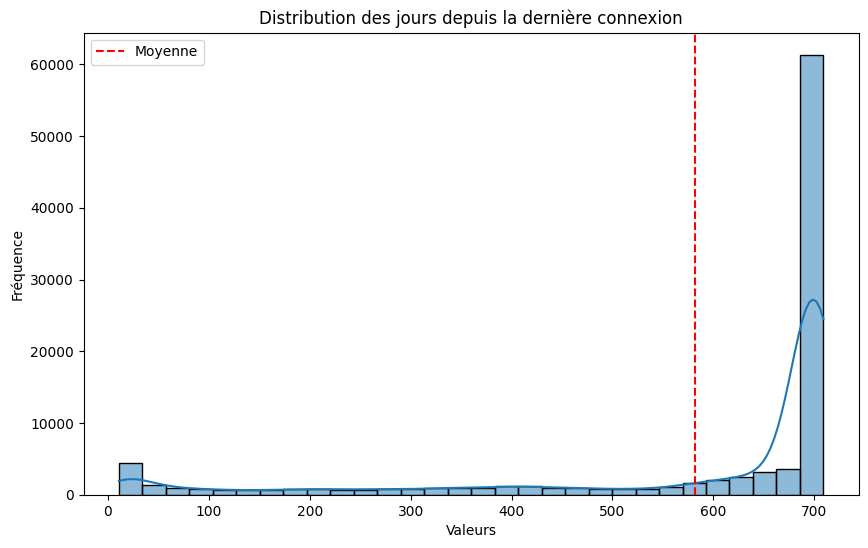

In [16]:
# Visualiser la distribution  
plt.figure(figsize=(10, 6))  
sns.histplot(db['daysSinceLastLogin'], bins=30, kde=True)  
plt.axvline(x=np.mean(db['daysSinceLastLogin']), color='red', linestyle='--', label='Moyenne')  
plt.title('Distribution des jours depuis la dernière connexion')  
plt.xlabel('Valeurs')  
plt.ylabel('Fréquence')  
plt.legend()  
plt.show()  

>La majorité des utilisateurs se connectent fréquemment, tandis qu’un groupe restreint reste inactif pendant de longues périodes.

Text(0.5, 1.0, 'hasAnyApp Bins')

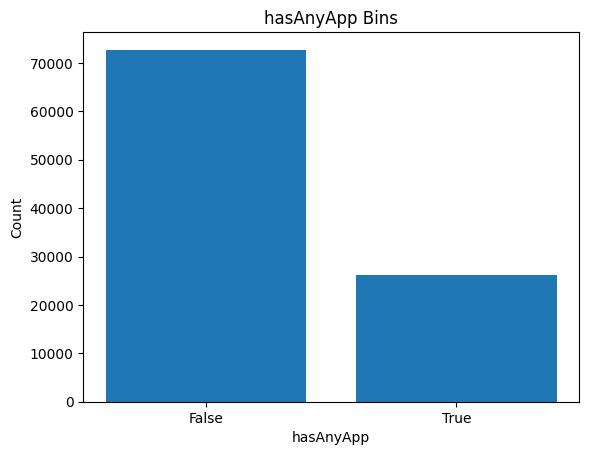

In [17]:
group_names=['False','True']
q=plt.bar(group_names, db['hasAnyApp'].value_counts())

# Utilisateur a déjà utilisé l'une des applications officielles du magasin
plt.xlabel("hasAnyApp")
plt.ylabel("Count")
plt.title("hasAnyApp Bins")

> La plupart des utilisateurs n'ont pas utilisé l'application mobile

In [18]:
df_group_two = db[['hasAnyApp','productsBought','productsSold']]
df_group_two = df_group_two.groupby(['hasAnyApp'],as_index=False).agg([np.sum,np.mean])
df_group_two

C:\Users\User\AppData\Local\Temp\ipykernel_20656\3675444363.py:2: FutureWarning: The provided callable <function sum at 0x0000020E7C337A60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_group_two = df_group_two.groupby(['hasAnyApp'],as_index=False).agg([np.sum,np.mean])
C:\Users\User\AppData\Local\Temp\ipykernel_20656\3675444363.py:2: FutureWarning: The provided callable <function mean at 0x0000020E7C35CEA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_group_two = df_group_two.groupby(['hasAnyApp'],as_index=False).agg([np.sum,np.mean])


hasAnyApp productsBought           productsSold          
                       sum      mean          sum      mean
0     False           7957  0.109391         3233  0.044447
1      True           9049  0.345725         8794  0.335982

> Les utilisateurs ayant une application achètent et vendent significativement plus de produits par rapport à ceux qui n'en ont pas.

Text(0.5, 1.0, 'civilityTitle Bins')

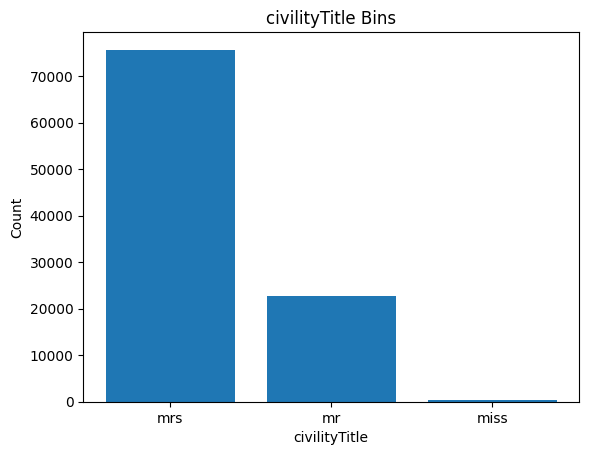

In [19]:
group_names=['mrs','mr','miss'] # Dames mariées ,Hommes et mademoiselle
plt.bar(group_names, height=db['civilityTitle'].value_counts())

# définir les étiquettes x/y et le titre 
plt.xlabel("civilityTitle")
plt.ylabel("Count")
plt.title("civilityTitle Bins")

> Les femmes mariées semblent être les utilisatrices les plus actives de ce site

In [20]:
df_group_one = db[['civilityTitle','productsBought','productsSold']]
df_group_one = df_group_one.groupby(['civilityTitle'],as_index=False).agg([np.sum,np.mean])
df_group_one

C:\Users\User\AppData\Local\Temp\ipykernel_20656\3517141676.py:2: FutureWarning: The provided callable <function sum at 0x0000020E7C337A60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_group_one = df_group_one.groupby(['civilityTitle'],as_index=False).agg([np.sum,np.mean])
C:\Users\User\AppData\Local\Temp\ipykernel_20656\3517141676.py:2: FutureWarning: The provided callable <function mean at 0x0000020E7C35CEA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_group_one = df_group_one.groupby(['civilityTitle'],as_index=False).agg([np.sum,np.mean])
C:\Users\User\AppData\Local\Temp\ipykernel_20656\3517141676.py:2: FutureWarning: The provided callable <function sum at 0x0000020E7C337A60> is currently using SeriesGroupBy.sum. In a future

civilityTitle productsBought           productsSold          
                           sum      mean          sum      mean
0          miss            287  0.656751          574  1.313501
1            mr           4262  0.186995         2673  0.117278
2           mrs          12457  0.164592         8780  0.116009

> Les hommes (mr) et les dames mariées (mrs) semblent plus actifs dans les achats en termes de quantités totales. Toutefois, les mademoiselles montrent une moyenne d'achats et de ventes plus élevée par utilisateur.

In [21]:
db.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [ ]:
from geopy.geocoders import Nominatim
import plotly.express as px
import pandas as pd
import time

# Sample only a small fraction of data to avoid rate limits
db_part = db.sample(frac=0.001).copy()

# Geolocation setup
geolocator = Nominatim(user_agent="geoapi")

def get_lat_lon(country):
    try:
        location = geolocator.geocode(country)
        if location:
            return location.latitude, location.longitude
    except:
        return None, None

# Get latitude and longitude for each country
db_part["lat"], db_part["lon"] = zip(*db_part["country"].apply(get_lat_lon))
time.sleep(1)  # Prevent API rate limits

# Remove rows with missing coordinates
db_part.dropna(subset=["lat", "lon"], inplace=True)

# Calculate density (number of users per country)
country_density = db_part["country"].value_counts().reset_index()
country_density.columns = ["country", "density"]

# Merge with the dataset to keep lat/lon
db_part = db_part.drop_duplicates(subset=["country"])
db_part = db_part.merge(country_density, on="country")

# Create the density map
fig = px.scatter_mapbox(
    db_part,
    lat="lat",
    lon="lon",
    size="density",  
    color="density",  
    hover_name="country",
    color_continuous_scale="Viridis",
    mapbox_style="open-street-map",
    zoom=1
)

print(db_part.shape)  
fig.show()


(15, 27)


Text(0.5, 1.0, 'language Bins')

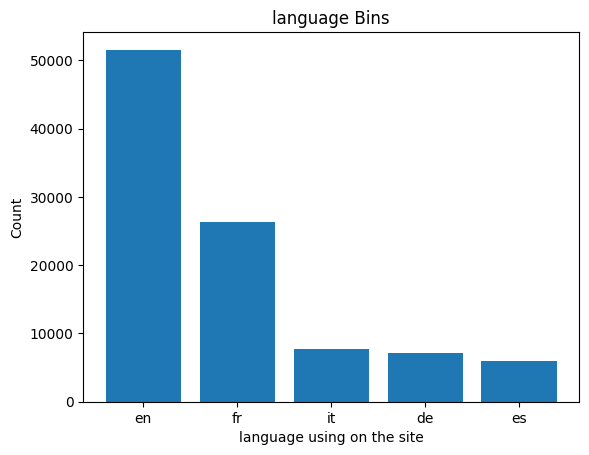

In [23]:
group_names=['en', 'fr', 'it', 'de', 'es']
q=plt.bar(group_names, db['language'].value_counts())

# définir les étiquettes x/y et le titre de l'intrigue
plt.xlabel("language using on the site")
plt.ylabel("Count")
plt.title("language Bins")

In [24]:
df_group_three = db[['language','productsBought','productsSold']]
df_group_three = df_group_three.groupby(['language'],as_index=False).agg([np.sum,np.mean])
df_group_three

C:\Users\User\AppData\Local\Temp\ipykernel_20656\95561689.py:2: FutureWarning:

The provided callable <function sum at 0x0000020E7C337A60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\User\AppData\Local\Temp\ipykernel_20656\95561689.py:2: FutureWarning:

The provided callable <function mean at 0x0000020E7C35CEA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

C:\Users\User\AppData\Local\Temp\ipykernel_20656\95561689.py:2: FutureWarning:

The provided callable <function sum at 0x0000020E7C337A60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



language productsBought           productsSold          
                      sum      mean          sum      mean
0       de           1705  0.237531          539  0.075091
1       en           8918  0.172950         4877  0.094581
2       es            797  0.132107          901  0.149345
3       fr           4386  0.166313         3004  0.113909
4       it           1200  0.154520         2706  0.348442

> La première langue préférée des utilisateurs est l'anglais et la seconde le français. Cependant, ils n'ont pas la moyenne de produits achetés et de produits vendus la plus élevée.

<Axes: xlabel='language', ylabel='count'>

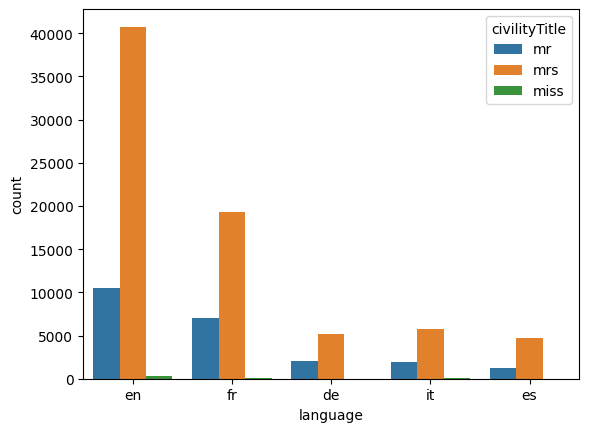

In [25]:
sns.countplot(x='language',data=db,hue='civilityTitle') 

> countplot nous indique qu'il y a plus d'utilisatrices mariées dans le monde.

### 2. Corrélation

Text(0.5, 1.0, 'Heatmap of Correlation Matrix for All Users')

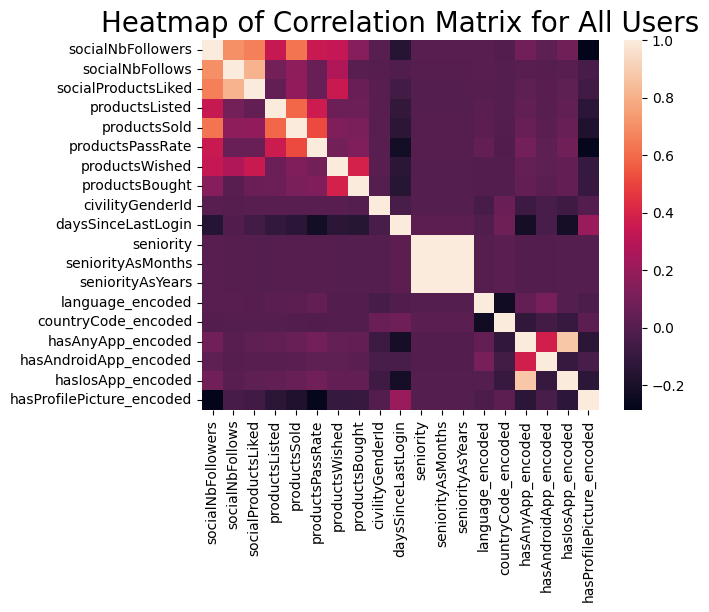

In [26]:
# plt.figure(figsize=(11,11))
a=sns.heatmap(db2.corr()) 
a.set_title('Heatmap of Correlation Matrix for All Users', fontsize = 20)

>Variable <b>daysSinceLastLogin & hasProfilePicture</b> : semblent être négativement corrélées à toutes les autres variables. Cependant, seuls 1,95 % des utilisateurs n’avaient pas de photo de profil.

>Variables <b>socialNbFollowers &socialNBFollows & socialproductsLiked & productsListed & productsSold & productsPassRate & productsWished </b> semblent être positivement liés les uns aux autres.

>La variable <b>seniority</b> ancienneté semble décorrélée à toutes les autres variables.

>Variables <b>language et country</b> semblent être négativement corrélés, ont une corrélation hebdomadaire avec les variables hasAnyApp & hasIosApp & hasAndroidApp ; mais n'ont presque aucune corrélation avec d'autres variables. Pour l’instant, nous pourrions conserver ces variables pour une analyse plus approfondie.

In [27]:
# supprimer les variables sans corrélations
no_columns=['seniority','seniorityAsMonths','seniorityAsYears']

db3 = db2.drop(no_columns, axis = 1)

In [28]:
# sns.pairplot(db3) # parplot aide à obtenir une relation un à un entre tous les attributs de l'ensemble de données

### 3. Corrélation entre likes et achats

<Axes: >

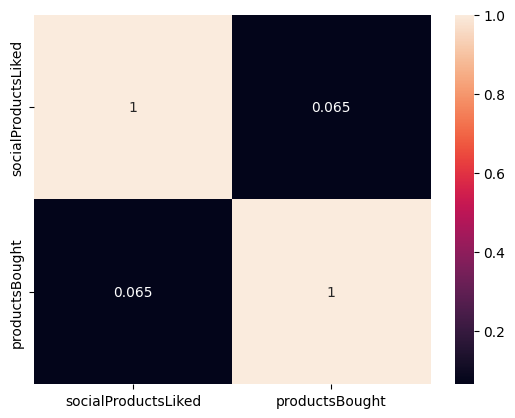

In [29]:
sns.heatmap(db3[['socialProductsLiked', 'productsBought']].corr(), annot=True)

> Cela signifie que le nombre de produits aimés sur les réseaux sociaux n'a presque aucun lien avec les achats effectués.

## 4. Activité des utilisateurs

<Axes: ylabel='count'>

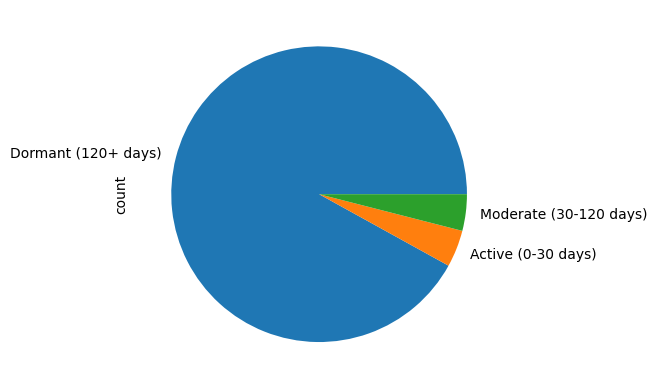

In [30]:
# Segmentation des activités
bins = [-1, 30, 120, np.inf]
labels = ['Active (0-30 days)', 'Moderate (30-120 days)', 'Dormant (120+ days)']
db3['activity_tier'] = pd.cut(db3['daysSinceLastLogin'], bins=bins, labels=labels)
db3['activity_tier'].value_counts().plot.pie()

>Cela indique un engagement utilisateur faible ou une rétention insuffisante. Une stratégie de réactivation pourrait être nécessaire pour améliorer l'engagement.

<Axes: >

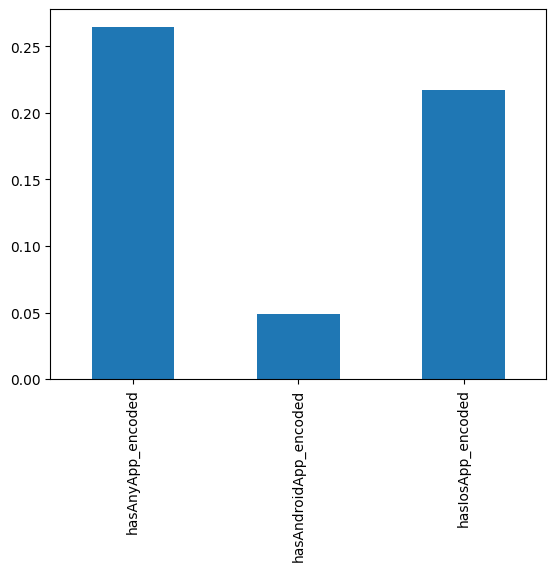

In [31]:
# Préférences de plateforme
platform_stats = db3.agg({
    'hasAnyApp_encoded': 'mean',
    'hasAndroidApp_encoded': 'mean',
    'hasIosApp_encoded': 'mean'
})
platform_stats.plot(kind='bar')

<Axes: xlabel='hasProfilePicture_encoded'>

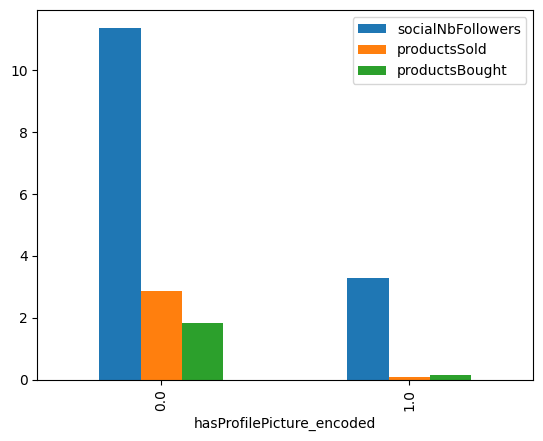

In [32]:
profile_analysis = db3.groupby('hasProfilePicture_encoded').agg({
    'socialNbFollowers': 'mean',
    'productsSold': 'mean',
    'productsBought': 'mean'
}).reset_index()
profile_analysis.plot(kind='bar', x='hasProfilePicture_encoded')

## V. Transformation des donnees

### 1 Ingénierie des fonctionnalités

isBot
False    98645
True       268
Name: count, dtype: int64

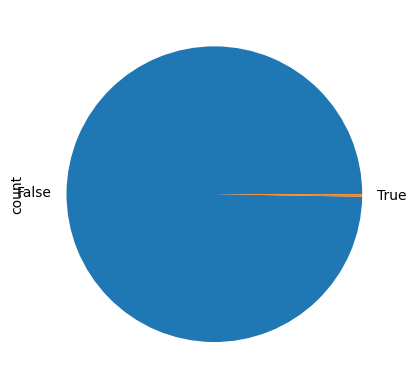

In [33]:
potential_bots = db3[
    (db3['socialNbFollowers'] > db3['socialNbFollowers'].quantile(0.99)) & 
    (db3['productsBought'] < 1) & 
    (db3['daysSinceLastLogin'] > 90)
]
db3['isBot'] = db3.index.isin(potential_bots.index)
db3['isBot'].value_counts().plot.pie()
db3['isBot'].value_counts()


>La majorité des utilisateurs sont considérés comme légitimes, tandis qu'une très petite fraction est détectée comme des bots selon les critères définis. Cela indique que peu d'utilisateurs remplissent les conditions suspectes (beaucoup de followers, peu d'achats, et inactivité prolongée).

### 2 Standarisation 

In [34]:
from sklearn.preprocessing import StandardScaler
X = db2.select_dtypes(include='number')
scaler = StandardScaler()
db2 = scaler.fit_transform(X)
db2 = pd.DataFrame(db2, columns=X.columns) 
db2

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,language_encoded,countryCode_encoded,hasAnyApp_encoded,hasAndroidApp_encoded,hasIosApp_encoded,hasProfilePicture_encoded
0,36.979467,0.029795,0.400925,12.636592,81.752629,8.610153,4.066160,0.355052,-1.805541,-2.730563,0.785680,0.785142,0.789927,-0.655763,-0.502269,1.667050,-0.226307,1.896005,0.139759
1,42.130969,-0.008056,-0.013372,9.222179,79.871944,11.551273,-0.062026,-0.073718,0.527219,-2.725775,0.833214,0.833273,0.832675,-0.655763,0.458348,1.667050,-0.226307,1.896005,0.139759
2,34.403717,0.086570,0.307017,16.051004,76.580745,10.963049,0.334915,1.212591,0.527219,-2.730563,0.827273,0.827925,0.832675,1.076308,-0.538519,1.667050,-0.226307,1.896005,-7.155196
3,32.858266,0.029795,0.052915,59.462818,71.408862,10.727760,0.215833,-0.073718,0.527219,-2.725775,0.797563,0.797620,0.789927,-0.655763,1.654588,1.667050,-0.226307,1.896005,-7.155196
4,42.130969,-0.008056,-0.024420,12.148818,58.714238,11.668918,-0.062026,-0.073718,0.527219,-2.677895,-1.246433,-1.247050,-1.240593,-0.655763,1.654588,-0.599862,-0.226307,-0.527425,0.139759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,-0.111342,-0.008056,-0.024420,-0.045511,-0.057169,-0.095563,-0.062026,-0.073718,-1.805541,0.606683,0.833214,0.833273,0.832675,1.076308,1.654588,-0.599862,-0.226307,-0.527425,0.139759
98909,-0.111342,-0.008056,-0.024420,-0.045511,-0.057169,-0.095563,-0.062026,-0.073718,-1.805541,0.544439,0.833214,0.833273,0.832675,1.076308,-0.538519,1.667050,-0.226307,1.896005,0.139759
98910,-0.111342,-0.008056,-0.024420,-0.045511,-0.057169,-0.095563,-0.062026,-0.073718,-1.805541,-0.293463,0.833214,0.833273,0.832675,-0.655763,-1.354137,1.667050,4.418781,-0.527425,0.139759
98911,-0.111342,-0.008056,-0.024420,-0.045511,-0.057169,-0.095563,-0.062026,-0.073718,0.527219,-1.504831,0.833214,0.833273,0.832675,1.942344,0.005227,-0.599862,-0.226307,-0.527425,0.139759


### 3. Informations sur les acheteurs

In [35]:
buyers_db = db3[db3['productsBought'] > 0]
print(f"""In average, buyers buy {buyers_db.productsBought.sum() / buyers_db.shape[0] :.2f} products. Details are as follows:""")

# Acheteurs réussis
Sbuyers_db = db3[db3.productsBought >= 3]
Sbuyers_db.dataframeName = "SBuyers"
print("Accordingly, Successful buyers: ", Sbuyers_db.shape[0])

buyers_db.productsBought.describe()

In average, buyers buy 3.14 products. Details are as follows:
Accordingly, Successful buyers:  1277


count    5419.000000
mean        3.138217
std         9.486478
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       405.000000
Name: productsBought, dtype: float64

In [36]:
Sbuyers_db.socialNbFollowers.describe()

count    1277.000000
mean        8.577917
std        10.768492
min         3.000000
25%         4.000000
50%         5.000000
75%         8.000000
max       137.000000
Name: socialNbFollowers, dtype: float64

### 4. Informations sur les vendeurs

In [37]:
# Vendeurs réels (au moins 1 produit vendu)
successful_sellers_db = db3[db3.productsSold > 0]
successful_sellers_db.dataframeName = "Actual sellers"
print("Accordingly, Actual sellers: ", successful_sellers_db.shape[0])

Accordingly, Actual sellers:  2036


In [38]:
print(f"""In average, actual sellers sell {successful_sellers_db.productsSold.sum() / successful_sellers_db.shape[0] :.2f} products. Details are as follows:""")
# Vendeurs à succès
Ssellers_db = db3[db3.productsSold >= 6]
Ssellers_db.dataframeName = "SSellers"
print("Accordingly, Successful sellers: ", Ssellers_db.shape[0])
successful_sellers_db.productsSold.describe()

In average, actual sellers sell 5.91 products. Details are as follows:
Accordingly, Successful sellers:  458


count    2036.000000
mean        5.907171
std        13.626529
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       174.000000
Name: productsSold, dtype: float64

><b>Fidélisation de la clientèle</b> : 70 % des utilisateurs réels sont des utilisateurs actifs qui ont des interactions sociales, c'est le groupe de personnes que le site Web devrait valoriser le plus. Cela implique également que le fait d’avoir un lien social entre vendeurs et acheteurs améliore la fidélité des utilisateurs. Les utilisateurs 3679 ont un fort potentiel de transformation en utilisateurs réels car ils ont une forte interaction sociale.

### 5. Informations sur les produits
% de produits répondant à la description du produit. (Les produits vendus sont examinés par l'équipe du magasin avant d'être expédiés à l'acheteur.) Ici, nous avons utilisé la variable <b>productsPassRate</b>, le pourcentage de produits répondant à la description du produit (l'équipe du magasin examine les produits vendus avant d'être expédiés à l'acheteur.) comme mesure critique. Nous avons défini les vendeurs avec un taux de réussite des produits supérieur et égal à 90 % comme les vendeurs de la plus haute qualité, les vendeurs avec un taux de réussite des produits supérieur et égal à 80 % et inférieur à 90 % comme les vendeurs de qualité moyenne-élevée, les vendeurs avec un taux de réussite des produits supérieur et égal à 60 % et inférieur à 80 % comme les vendeurs de qualité standard, les vendeurs avec un taux de réussite des produits inférieur à 60 % comme les vendeurs de faible qualité.

In [39]:
productsH_db = db3[db3.productsPassRate >= 90]
productsH_db.dataframeName = "Best quality's store"
print("Numbers of sellers with the highest quality: ", productsH_db.shape[0])

productsMh_db = db3[(db3.productsPassRate >= 80) & (db3.productsPassRate < 90)]
productsMh_db.dataframeName = "medium-high quality's store"
print("Numbers of sellers with the Medium-high quality: ", productsMh_db.shape[0])

productsS_db = db3[(db3.productsPassRate >= 60) &  (db3.productsPassRate < 80)]
productsS_db.dataframeName = "Standard qualisty's store"
print("Numbers of sellers with the stadard quality: ", productsS_db.shape[0])

productsU_db = db3[(db3.productsPassRate < 60) &  (db3.productsPassRate > 0)]
productsU_db.dataframeName = "Unqualified store"
print("Numbers of sellers with low quality: ", productsU_db.shape[0]+
      (successful_sellers_db.shape[0]-productsH_db.shape[0]-productsMh_db.shape[0]-productsS_db.shape[0]-productsU_db.shape[0]))

Numbers of sellers with the highest quality:  539
Numbers of sellers with the Medium-high quality:  129
Numbers of sellers with the stadard quality:  174
Numbers of sellers with low quality:  1194


In [40]:
sellers_db = db3[(db3.productsListed > 0) | (db3.productsSold > 0)]
print(f"""In average, active low quality sellers sell {productsU_db.productsSold.sum() / sellers_db.shape[0] :.2f} """)
print(f"""In average, active standard quality sellers sell {productsS_db.productsSold.sum() / sellers_db.shape[0] :.2f} """)
print(f"""In average, active medium-high quality sellers sell {productsMh_db.productsSold.sum() / sellers_db.shape[0] :.2f} """)
print(f"""In average, active high quality sellers sell {productsH_db.productsSold.sum() / sellers_db.shape[0] :.2f} products. Details are as follows:""")
productsH_db.productsSold.describe()

In average, active low quality sellers sell 0.24 
In average, active standard quality sellers sell 0.60 
In average, active medium-high quality sellers sell 0.77 
In average, active high quality sellers sell 2.31 products. Details are as follows:


count    539.000000
mean      11.653061
std       20.687448
min        1.000000
25%        2.000000
50%        4.000000
75%       11.000000
max      170.000000
Name: productsSold, dtype: float64

>Les vendeurs de haute qualité vendent en moyenne plus de produits (2.31) que les autres catégories, tandis que les vendeurs de faible qualité en vendent très peu (0.24).

>Une grande variation parmi les vendeurs de haute qualité, avec une moyenne de 11.65 produits vendus et un maximum de 170. Cela indique que la performance des vendeurs varie considérablement, même au sein des catégories.

## Choix des Tehniques d'analyse

###  1. Choix de dendogramme :

Étant donné que cet dataset est trop volumineux pour dessiner un dendrogramme, nous pourrions choisir 30 % des données au hasard.

In [41]:
print("Dataset d'origine avant filtrage", db.shape)
print("Données restantes après filtrage des variables sans corrélations:\n",db3.shape)
db_final = db3.sample(frac = 0.01)
print("\n Colonnes de retrait finales: \n",db_final.columns)
print("\n Données finales de rétrécissement: \n",db_final.shape)


Dataset d'origine avant filtrage (98913, 24)
Données restantes après filtrage des variables sans corrélations:
 (98913, 18)

 Colonnes de retrait finales: 
 Index(['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
       'productsBought', 'civilityGenderId', 'daysSinceLastLogin',
       'language_encoded', 'countryCode_encoded', 'hasAnyApp_encoded',
       'hasAndroidApp_encoded', 'hasIosApp_encoded',
       'hasProfilePicture_encoded', 'activity_tier', 'isBot'],
      dtype='object')

 Données finales de rétrécissement: 
 (989, 18)


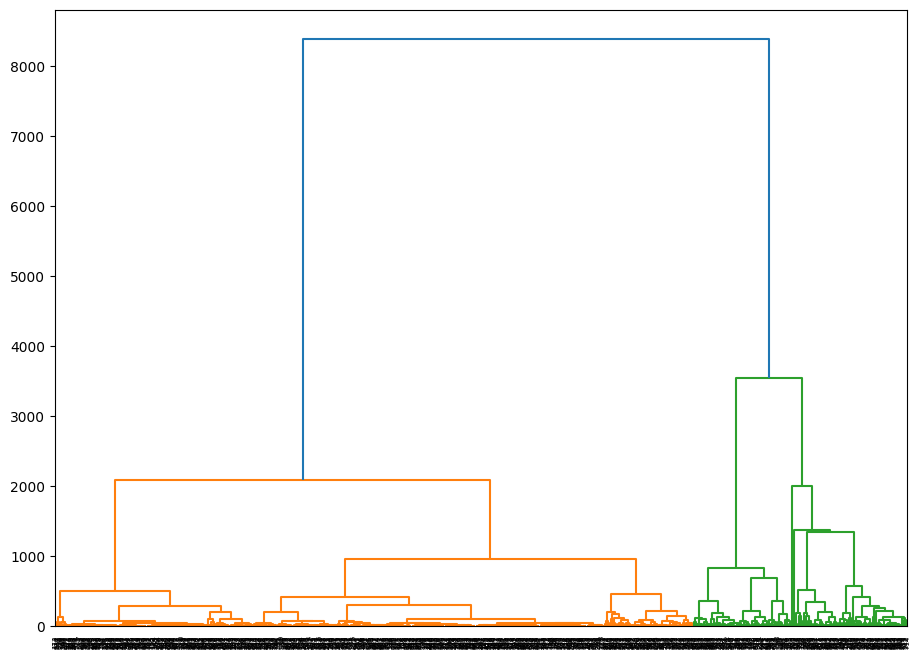

In [42]:

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
db_final = db_final.select_dtypes(include='number')
fig = plt.figure(figsize = (11, 8))
dendogram = sch.dendrogram(sch.linkage(db_final,method = 'ward'))

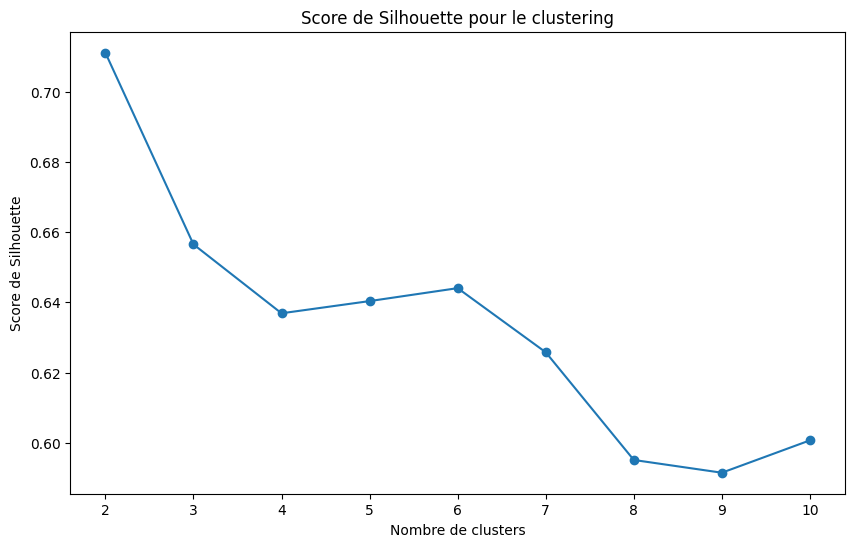

In [64]:
from sklearn.metrics import silhouette_score  

scores = []
for n_clusters in range(2, 11):  
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  
    preds = clusterer.fit_predict(db_final)  
    score = silhouette_score(db_final, preds)  
    scores.append(score)  

# Création du graphique  
fig, ax = plt.subplots(figsize=(10, 6))  
plt.plot(range(2, 11), scores, marker='o')  
plt.title("Score de Silhouette pour le clustering")  
plt.xlabel("Nombre de clusters")  
plt.ylabel("Score de Silhouette")  

# Affichage du graphique  
plt.show()  

>Selon le tracé du dendrogramme, le nombre de clusters recommandé serait de deux. Nous pourrions ensuite segmenter les utilisateurs en deux groupes principaux (Actif/Inactif). Cependant, il semble également que nous pourrions regrouper les données en plus de clusters si nécessaire, étant donné la distribution observée des scores de silhouette.

## Nous passons à la table concernant les vendeurs existants sur ce site.

> Nous passons à la table concernant les vendeurs existants sur ce site.
Ce jeux de données a été ectrait de la meme source (plateforme C2C)
Comparaison des comptes vendeurs par pays et sexe.
Vous pouvez l’utiliser pour déterminer ce que certains pays doivent apprendre des autres.

In [65]:
sellers = pd.read_csv('../data/seller.csv')
sellers.head()

,country,sex,nbsellers,meanproductssold,meanproductslisted,meansellerpassrate,totalproductssold,totalproductslisted,meanproductsbought,meanproductswished,meanproductsliked,totalbought,totalwished,totalproductsliked,meanfollowers,meanfollows,percentofappusers,percentofiosusers,meanseniority
0,Allemagne,Female,116,4.03,2.72,27.33,468,315,3.05,34.66,35.28,354,4021,4092,9.5,8.9,54.0,49.0,3060.336207
1,Allemagne,Male,34,2.00,1.00,19.15,68,34,1.62,3.38,31.79,55,115,1081,7.8,8.4,79.0,64.0,3089.058824
2,Arménie,Female,1,0.00,25.00,0.00,0,25,0.00,0.00,1.00,0,0,1,4.0,8.0,NaN,NaN,3201.000000
3,Australie,Female,18,0.94,1.33,10.44,17,24,6.11,17.72,209.28,110,319,3767,7.5,9.3,55.0,55.0,3103.666667
4,Australie,Male,3,6.00,4.00,33.33,18,12,8.00,24.00,38.33,24,72,115,12.7,8.3,66.0,66.0,3085.666667


<Axes: >

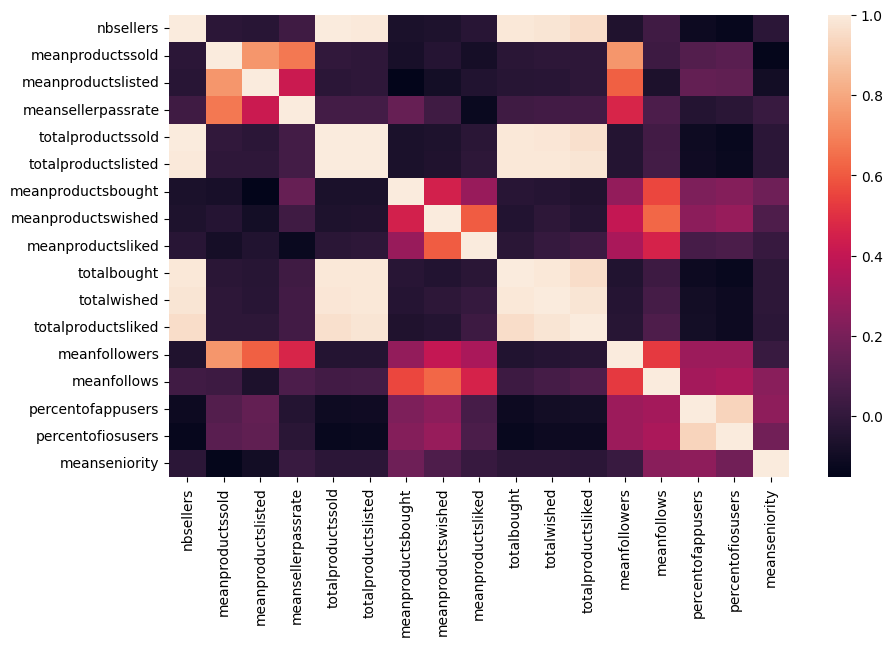

In [66]:
plt.figure(figsize=(10, 6))
sns.heatmap(sellers.select_dtypes(include='number').corr() )

>On observe des liens forts entre les variables similaires, comme <b>mean products sold</b> et <b>mean seller pass rate </b>, ou <b>total products liked</b> et <b>total bought</b>. Enfin, certaines variables comme <b>meanseniority</b> ou <b>percentofiosusers</b> semblent faiblement corrélées aux autres.

### 2. K-means

Nombre optimal de clusters basé sur le score de silhouette: 3


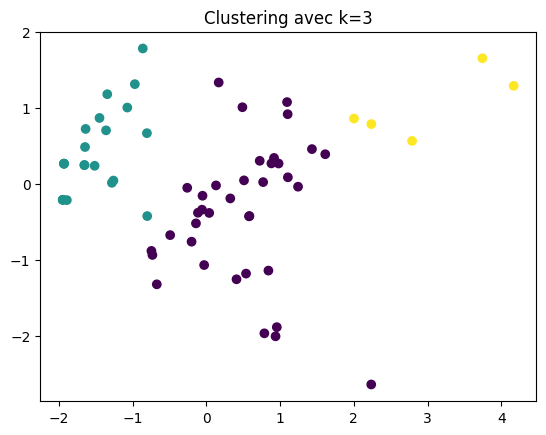

In [67]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Charger les données
sellers = pd.read_csv('../data/seller.csv')

# Sélection des colonnes d'intérêt
cols = ['meanproductssold', 'meanproductslisted', 'meansellerpassrate']
db_final_subset = sellers[cols].dropna()

# Standardisation des données (Z-score)
z_scores = (db_final_subset - db_final_subset.mean()) / db_final_subset.std()

# Filtrage des valeurs aberrantes (Z-score > 3)
db_final_subset = db_final_subset[(z_scores < 3).all(axis=1)]

# Calcul de l'IQR pour détecter les valeurs aberrantes
Q1 = db_final_subset.quantile(0.25)
Q3 = db_final_subset.quantile(0.75)
IQR = Q3 - Q1

# Filtrage des valeurs aberrantes en fonction de l'IQR
db_final_subset = db_final_subset[~((db_final_subset < (Q1 - 1.5 * IQR)) | (db_final_subset > (Q3 + 1.5 * IQR))).any(axis=1)]

# Normalisation des données
scaler = StandardScaler()
db_final_scaled = scaler.fit_transform(db_final_subset)

# Définir les valeurs de k à tester
k_values = range(2, 11)  # Exemple : tester k entre 2 et 10

# Méthode silhouette
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(db_final_scaled)
    silhouettes.append(silhouette_score(db_final_scaled, kmeans.labels_))

# Trouver le k optimal en fonction du score silhouette
optimal_k = k_values[silhouettes.index(max(silhouettes))]

print(f"Nombre optimal de clusters basé sur le score de silhouette: {optimal_k}")

# Exécuter K-Means avec le k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(db_final_scaled)
labels = kmeans.labels_

# Visualisation après PCA
pca = PCA(n_components=2)
db_final_pca = pca.fit_transform(db_final_scaled)

plt.scatter(db_final_pca[:, 0], db_final_pca[:, 1], c=labels, cmap='viridis')
plt.title(f"Clustering avec k={optimal_k}")
plt.show()


> donc en obtient 3 classes de vendeurs

## Regression

### 1. Implimentation de regression

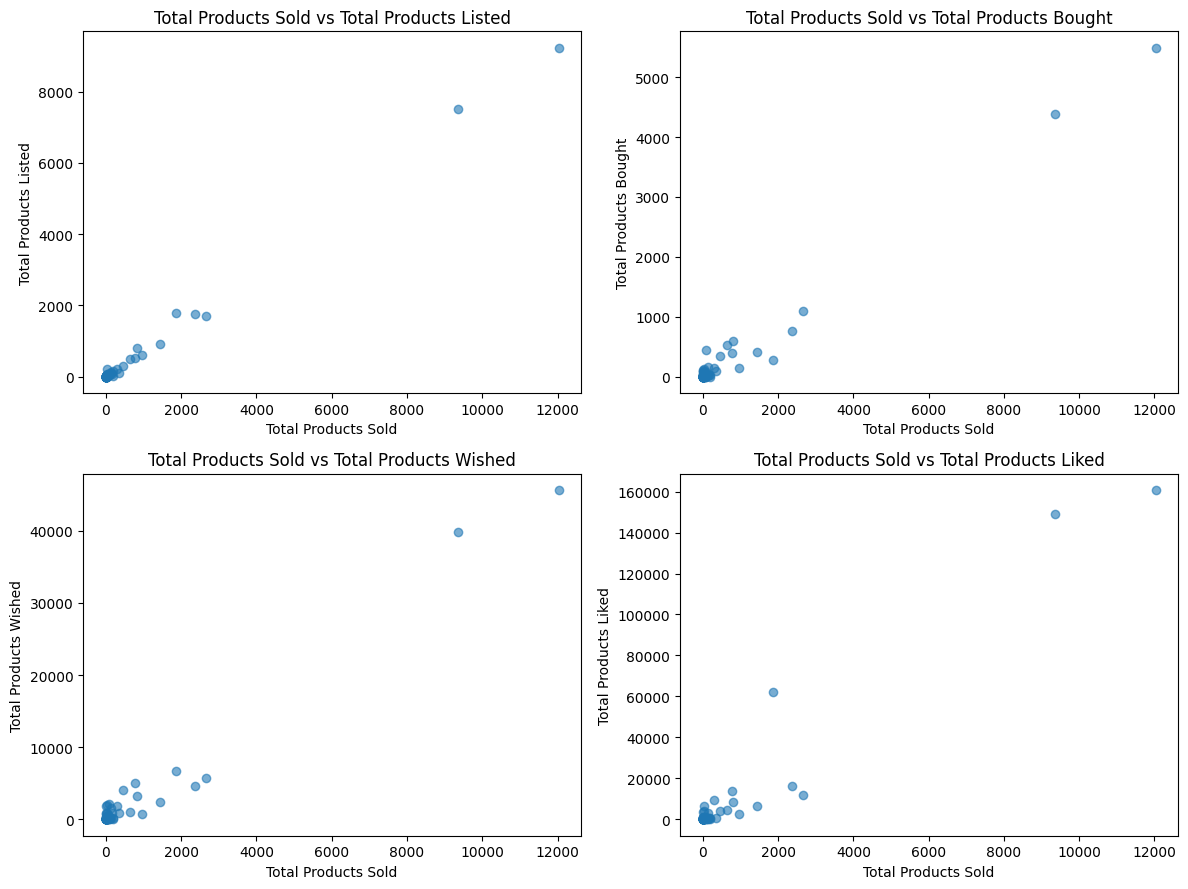

In [68]:
plt.figure(figsize=(12, 9))  
 
plt.subplot(2, 2, 1)  
plt.scatter(sellers.totalproductssold, sellers.totalproductslisted, alpha=0.6)  
plt.xlabel('Total Products Sold')  
plt.ylabel('Total Products Listed')  
plt.title('Total Products Sold vs Total Products Listed')  

plt.subplot(2, 2, 2)  
plt.scatter(sellers.totalproductssold, sellers.totalbought, alpha=0.6)  
plt.xlabel('Total Products Sold')  
plt.ylabel('Total Products Bought')  
plt.title('Total Products Sold vs Total Products Bought')  

plt.subplot(2, 2, 3)  
plt.scatter(sellers.totalproductssold, sellers.totalwished, alpha=0.6)  
plt.xlabel('Total Products Sold')  
plt.ylabel('Total Products Wished')  
plt.title('Total Products Sold vs Total Products Wished')  

plt.subplot(2, 2, 4)  
plt.scatter(sellers.totalproductssold, sellers.totalproductsliked, alpha=0.6)  
plt.xlabel('Total Products Sold')  
plt.ylabel('Total Products Liked')  
plt.title('Total Products Sold vs Total Products Liked')  

plt.tight_layout()  
plt.show()  

>Ces scatters plots montrent une corrélation positive entre le nombre total de produits vendus et les autres variables (listés, achetés, souhaités, aimés). Quelques points extrêmes indiquent des vendeurs très actifs qui influencent fortement les tendances. La densité élevée près de l'origine suggère que la majorité des vendeurs ont une activité limitée. Plus un vendeur vend, plus ses produits sont listés, achetés, souhaités et aimés.

### 1.1. Standarisation des variables cibles

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score


In [70]:
# Définissez les fonctionnalités du prédicteur et la variable cible.
features = ['totalproductslisted', 'totalbought', 'totalwished', 'totalproductsliked']
target = 'totalproductssold'

X = sellers[features]
y = sellers[target]

# Standardisez les fonctionnalités du prédicteur.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



### 1.2. ACP

In [71]:
# Initialisez ACP.
pca_temp = PCA().fit(X_scaled)
cumulative_variance = pca_temp.explained_variance_ratio_.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)

# Supposons que nous décidions de conserver 2 composants (ajustez en fonction de vos données).
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio by each component:", pca.explained_variance_ratio_)

Cumulative Explained Variance: [0.98545453 0.9966849  0.99938945 1.        ]
Explained Variance Ratio by each component: [0.98545453 0.01123036]


>Les deux premiers composants principaux expliquent 99.7% de la variance cumulée des données, ce qui signifie qu'ils capturent presque toute l'information pertinente. Le premier composant seul explique 98.5% de la variance, tandis que le deuxième n'ajoute que 1.1%. Cela suggère que la réduction à deux dimensions est très efficace pour représenter les données.

### 1.3. Diviser les données

In [72]:

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

>On divise les données transformées (X_pca) en ensembles d'entraînement (80%) et de test (20%)

### 1.4. Modèle de régression linéaire

In [73]:
# Initialisez et entraînez le modèle.
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prédictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Métriques d'évaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nPerformance du modèle:")
print(f"Training MSE: {train_mse} | Test MSE: {test_mse}")
print(f"Training R²: {train_r2} | Test R²: {test_r2}")

# Validation croisée
cv_scores = cross_val_score(lr, X_pca, y, cv=5, scoring='neg_mean_squared_error')
print(f"\nCross-validation MSE: {-cv_scores.mean():.2f}")


Performance du modèle:
Training MSE: 35304.63905216904 | Test MSE: 39460.70972695267
Training R²: 0.9792503621343618 | Test R²: 0.9955446805399032

Cross-validation MSE: 134442.33


> Le MSE moyen obtenu par validation croisée est de 134 442,33, ce qui est nettement plus élevé que le MSE sur le test. Cela pourrait indiquer que le modèle est moins performant sur certains sous-ensembles de données, ce qui renforce l'hypothèse d'un possible surapprentissage.

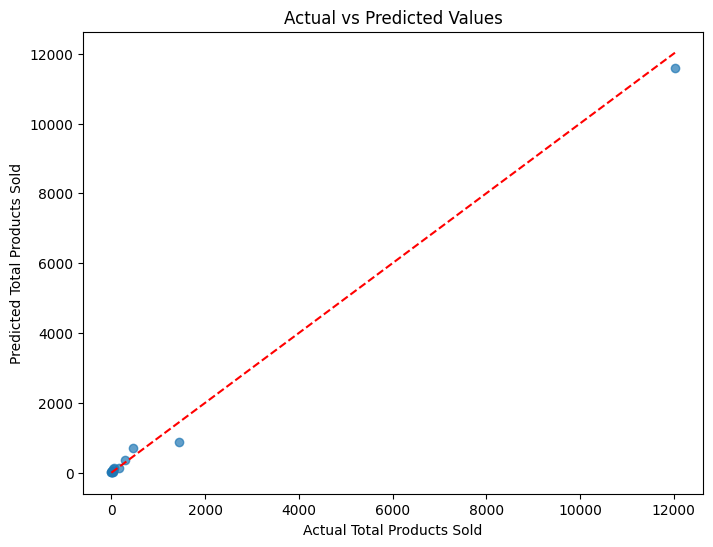

In [74]:
y_pred = lr.predict(X_test)
#En option, vous pouvez tracer les valeurs prévues par rapport aux valeurs réelles.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Total Products Sold")
plt.ylabel("Predicted Total Products Sold")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

> Presque tous les points suivent cette ligne, le modèle fait des prédictions très précises. Cela suggère une forte corrélation entre les valeurs réelles et prédites.

### 1.5. <b>Exemple</b>: Créez de nouvelles données pour prédire le nombre de produits vendus.

In [75]:
# Remplacez les valeurs ci-dessous par vos nouvelles données réelles.
new_data = {
    'totalproductslisted': [150],   # Exemple de valeur pour le total des produits répertoriés
    'totalbought': [75],            # Exemple de valeur pour le total des produits achetés
    'totalwished': [50],            # Exemple de valeur pour le total des produits souhaités
    'totalproductsliked': [100]     # Exemple de valeur pour le total des produits aimés
}

# Convertissez les nouvelles données en DataFrame.
new_df = pd.DataFrame(new_data)

#Appliquer la même mise à l'échelle et la même transformation ACP aux nouvelles données
new_scaled = scaler.transform(new_df) 
new_pca = pca.transform(new_scaled)   

# Utilisez le modèle de régression linéaire entraîné pour prédire le total des produits vendus
predicted_products_sold = lr.predict(new_pca)

print("Predicted Total Products Sold for the new data:", predicted_products_sold[0])

Predicted Total Products Sold for the new data: 134.02204949330826


> Les modèles Ridge et Lasso sont des techniques de régularisation utilisées pour améliorer les performances des modèles de régression linéaire, en particulier lorsque les données présentent des problèmes de multicolinéarité (variables explicatives fortement corrélées) ou de surapprentissage (overfitting).

### 2. Modèle de Régression au Ridge/lasso

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


### 2.1. Visualisation des données

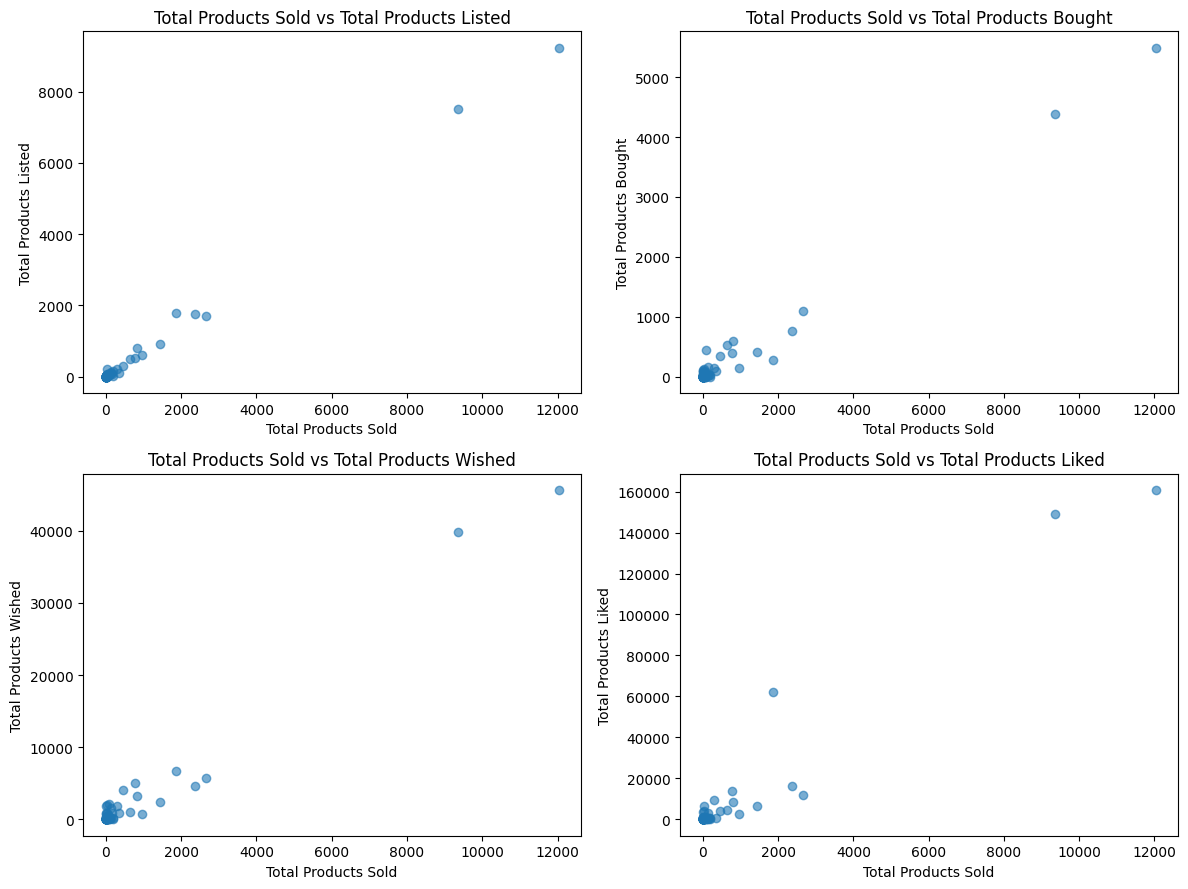

In [77]:
plt.figure(figsize=(12, 9))

plt.subplot(2, 2, 1)
plt.scatter(sellers.totalproductssold, sellers.totalproductslisted, alpha=0.6)
plt.xlabel('Total Products Sold')
plt.ylabel('Total Products Listed')
plt.title('Total Products Sold vs Total Products Listed')

plt.subplot(2, 2, 2)
plt.scatter(sellers.totalproductssold, sellers.totalbought, alpha=0.6)
plt.xlabel('Total Products Sold')
plt.ylabel('Total Products Bought')
plt.title('Total Products Sold vs Total Products Bought')

plt.subplot(2, 2, 3)
plt.scatter(sellers.totalproductssold, sellers.totalwished, alpha=0.6)
plt.xlabel('Total Products Sold')
plt.ylabel('Total Products Wished')
plt.title('Total Products Sold vs Total Products Wished')

plt.subplot(2, 2, 4)
plt.scatter(sellers.totalproductssold, sellers.totalproductsliked, alpha=0.6)
plt.xlabel('Total Products Sold')
plt.ylabel('Total Products Liked')
plt.title('Total Products Sold vs Total Products Liked')

plt.tight_layout()
plt.show()


### 2.2. Préparer les données

In [78]:
#Définissez les fonctionnalités du prédicteur et la variable cible
features = ['totalproductslisted', 'totalbought', 'totalwished', 'totalproductsliked']
target = 'totalproductssold'

X = sellers[features]
y = sellers[target]

# Standardisez les fonctionnalités du prédicteur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 2.3. Diviser les données

In [79]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 2.4. Régression au lasso


Meilleurs paramètres pour Ridge :
{'alpha': 0.01}

Performance du modèle Ridge :
Training MSE: 4900.82 | Test MSE: 11495.37
Training R²: 0.9971 | Test R²: 0.9987

Meilleurs paramètres pour Lasso :
{'alpha': 1}

Performance du modèle Lasso :
Training MSE: 5185.90 | Test MSE: 12238.20
Training R²: 0.9970 | Test R²: 0.9986


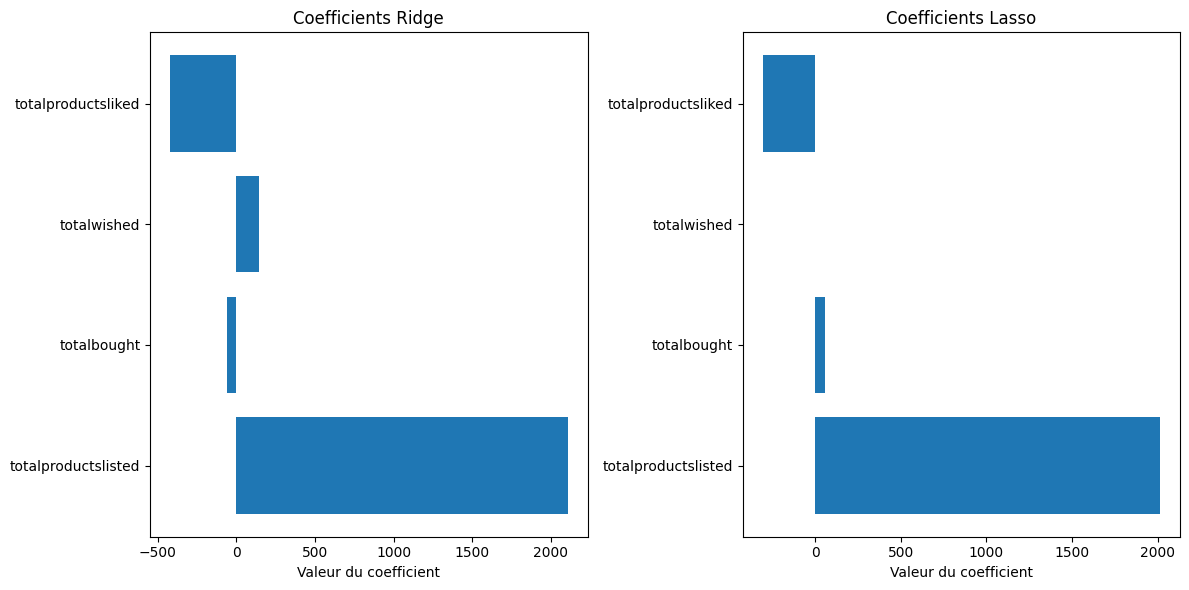


Comparaison des modèles :
Ridge Test MSE: 11495.37 | Lasso Test MSE: 12238.20
Ridge Test R²: 0.9987 | Lasso Test R²: 0.9986


In [80]:

# Initialisation du modèle Ridge
ridge = Ridge()

# Grille d'hyperparamètres pour Ridge
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Force de la régularisation L2
}

# Recherche des meilleurs paramètres
grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid_ridge,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

grid_search_ridge.fit(X_train, y_train)

# Meilleurs paramètres pour Ridge
print("\nMeilleurs paramètres pour Ridge :")
print(grid_search_ridge.best_params_)

# Modèle Ridge optimisé
best_ridge = grid_search_ridge.best_estimator_

# Prédictions et évaluation
y_train_pred_ridge = best_ridge.predict(X_train)
y_test_pred_ridge = best_ridge.predict(X_test)

train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print("\nPerformance du modèle Ridge :")
print(f"Training MSE: {train_mse_ridge:.2f} | Test MSE: {test_mse_ridge:.2f}")
print(f"Training R²: {train_r2_ridge:.4f} | Test R²: {test_r2_ridge:.4f}")

# Initialisation du modèle Lasso
lasso = Lasso()

# Grille d'hyperparamètres pour Lasso
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Force de la régularisation L1
}

# Recherche des meilleurs paramètres
grid_search_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid_lasso,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

grid_search_lasso.fit(X_train, y_train)

# Meilleurs paramètres pour Lasso
print("\nMeilleurs paramètres pour Lasso :")
print(grid_search_lasso.best_params_)

# Modèle Lasso optimisé
best_lasso = grid_search_lasso.best_estimator_

# Prédictions et évaluation
y_train_pred_lasso = best_lasso.predict(X_train)
y_test_pred_lasso = best_lasso.predict(X_test)

train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print("\nPerformance du modèle Lasso :")
print(f"Training MSE: {train_mse_lasso:.2f} | Test MSE: {test_mse_lasso:.2f}")
print(f"Training R²: {train_r2_lasso:.4f} | Test R²: {test_r2_lasso:.4f}")


plt.figure(figsize=(12, 6))

# Coefficients Ridge
plt.subplot(1, 2, 1)
plt.barh(features, best_ridge.coef_)
plt.title("Coefficients Ridge")
plt.xlabel("Valeur du coefficient")

# Coefficients Lasso
plt.subplot(1, 2, 2)
plt.barh(features, best_lasso.coef_)
plt.title("Coefficients Lasso")
plt.xlabel("Valeur du coefficient")

plt.tight_layout()
plt.show()

print("\nComparaison des modèles :")
print(f"Ridge Test MSE: {test_mse_ridge:.2f} | Lasso Test MSE: {test_mse_lasso:.2f}")
print(f"Ridge Test R²: {test_r2_ridge:.4f} | Lasso Test R²: {test_r2_lasso:.4f}")

>Les modèles Ridge et Lasso montrent des performances exceptionnelles les données, avec une généralisation presque parfaite. Ridge est légèrement meilleur en termes de MSE et R², mais Lasso offre une simplification du modèle en sélectionnant les variables les plus importantes. Choisissez Ridge si la performance est prioritaire, ou Lasso si la simplicité et l'interprétabilité sont plus importantes.

## Lasso

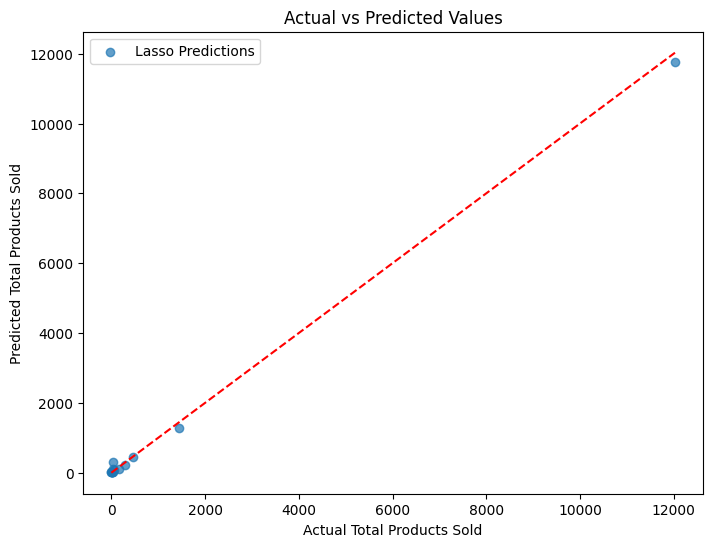

In [81]:
# Facultatif : traçage du réel par rapport aux prévisions pour la crête (ou le lasso)
lasso.fit(X_train, y_train)

# Prédisez sur l'ensemble de test à l'aide de Lasso.
lasso_pred = lasso.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_pred, alpha=0.7, label='Lasso Predictions')
plt.xlabel("Actual Total Products Sold")
plt.ylabel("Predicted Total Products Sold")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.legend()
plt.show()


## Ridge

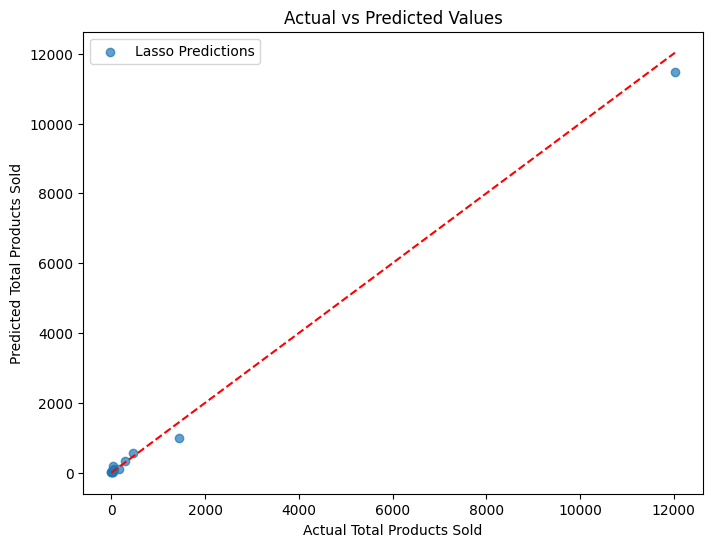

In [82]:

ridge.fit(X_train, y_train)

# Prédisez sur l'ensemble de test à l'aide de Lasso.
Ridge_pred = ridge.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, Ridge_pred, alpha=0.7, label='Lasso Predictions')
plt.xlabel("Actual Total Products Sold")
plt.ylabel("Predicted Total Products Sold")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.legend()
plt.show()


### 2.5. Prédire de nouvelles données

In [83]:
new_data = {
    'totalproductslisted': [150],  
    'totalbought': [75],           
    'totalwished': [50],           
    'totalproductsliked': [100]    
}

# Convertissez les nouvelles données en DataFrame.
new_df = pd.DataFrame(new_data)

# Appliquez la même mise à l'échelle aux nouvelles données.
new_scaled = scaler.transform(new_df)

new_pred_lasso = lasso.predict(new_scaled)

print("Predicted Total Products Sold for the new data:")
print("Using Lasso Regression:", new_pred_lasso[0])

Predicted Total Products Sold for the new data:
Using Lasso Regression: 228.73748547168145


>Le modèle de régression Lasso prédit qu'avec les caractéristiques fournies (produits listés, achetés, souhaités et aimés), environ 230 produits seront vendus.

In [84]:
new_data = {
    'totalproductslisted': [150],  
    'totalbought': [75],           
    'totalwished': [50],           
    'totalproductsliked': [100]    
}

# Convertissez les nouvelles données en DataFrame.
new_df = pd.DataFrame(new_data)

# Appliquez la même mise à l'échelle aux nouvelles données.
new_scaled = scaler.transform(new_df)

new_pred_lasso = ridge.predict(new_scaled)

print("Predicted Total Products Sold for the new data:")
print("Using Lasso Regression:", new_pred_lasso[0])

Predicted Total Products Sold for the new data:
Using Lasso Regression: 168.36230290489368


>Le modèle de régression Ridge prédit qu'avec les caractéristiques fournies (produits listés, achetés, souhaités et aimés), environ 168 produits seront vendus.